# gifrer月度运营比较分析
   比较2017年12月和2018年1月两个月的运营数据  
   从人、货、场出发比较分析两个月的运营质量

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False#是否可以显示负号

In [2]:
order_df=pd.read_csv('/Users/xucoolboy/practise/gifrer/gifrer海外旗舰店_utf8.csv')
cus_df=pd.read_csv('/Users/xucoolboy/practise/gifrer/gifrer_cus_utf8.csv')

In [3]:
#时间格式转换
order_df['付款时间']=pd.to_datetime(order_df.付款时间)
order_df['创建时间']=pd.to_datetime(order_df.创建时间)
cus_df['淘宝注册时间']=pd.to_datetime(cus_df.淘宝注册时间)
cus_df['最近交易时间']=pd.to_datetime(cus_df.最近交易时间)
order_df['付款年月']=order_df.付款时间.values.astype('datetime64[M]')

In [4]:
order_df['订单号']=order_df['订单号'].astype('str')
order_df.insert(1,'订单标识',order_df['订单号'].str[0:8]+order_df['订单号'].str[-4:])

In [5]:
order_df['宝贝id']=order_df.宝贝链接.str.extract('=(\d+)')

/Users/xucoolboy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [7]:
#补全类型信息后导入csv文件
baobeitype_df=pd.read_csv('baobeiidnew')
baobeitype_df.columns=['宝贝id','类型']
baobeitype_df.head()
baobeitype_df['类型']=baobeitype_df['类型'].astype('str')

In [8]:
order_df['宝贝id']=order_df['宝贝id'].astype('int')
order_df=order_df.merge(baobeitype_df,on='宝贝id')

In [57]:
#计算每个订单
order_df['订单商品详情']=order_df['类型']*order_df['宝贝数量']

In [59]:
order_df=order_df.groupby('订单标识').agg({'买家旺旺':'max','付款时间':'max','付款年月':'max','子订单金额':'sum',
                             '宝贝数量':'sum','订单商品详情':'sum'}).reset_index()

In [67]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122725 entries, 0 to 122724
Data columns (total 7 columns):
订单标识      122725 non-null object
买家旺旺      122725 non-null object
付款时间      122725 non-null datetime64[ns]
付款年月      122725 non-null datetime64[ns]
子订单金额     122725 non-null float64
宝贝数量      122725 non-null int64
订单商品详情    122725 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 6.6+ MB


## 人

### 购买人数、金额、客单的总体及新老客比较
    月销售额=月新客销售额+月老客销售额=月新客人数*新客客单价+月老客数*老客客单价

In [10]:
newcus_per_M=order_df.groupby('买家旺旺').付款年月.min().value_counts()

In [16]:
customer_num_per_M=order_df.groupby(['付款年月','买家旺旺']).类型.count().reset_index().groupby('付款年月').买家旺旺.count()

In [19]:
order_amount_per_M=order_df.groupby('付款年月').子订单金额.sum()

In [178]:
#各月付款金额
order_amount_per_M.iloc[14:16]

付款年月
2017-12-01    1070897.83
2018-01-01    1079405.62
Name: 子订单金额, dtype: float64

In [179]:
#各月付款人数
customer_num_per_M.iloc[14:16]

付款年月
2017-12-01    12266
2018-01-01    14425
Name: 买家旺旺, dtype: int64

In [180]:
#每月老客占比
(1-newcus_per_M/customer_num_per_M).iloc[14:16]

2017-12-01    0.072314
2018-01-01    0.069879
dtype: float64

两个月新老客占比几乎一致

In [ ]:
#新老客贡献度比较，新老客客单价比较
新老客成交1件和2件以上占比比较，成交单价比较

In [68]:
#客户每月购买情况表
user_month_df=order_df.groupby(['买家旺旺','付款年月']).agg({'付款时间':'count','宝贝数量':\
                                                     'sum','子订单金额':'sum','订单商品详情':'sum'})
user_month_df=user_month_df.rename(columns={'付款时间':'购买次数','子订单金额':'购买金额'}).reset_index()

In [261]:
saleinfo_per_M=user_month_df.groupby('付款年月').agg({'买家旺旺':'count','购买次数':'sum',
                                        '宝贝数量':'sum','购买金额':'sum','订单商品详情':'sum'})
saleinfo_per_M=saleinfo_per_M.rename(columns={'买家旺旺':'购买人数'})
saleinfo_per_M['客单价']=saleinfo_per_M['购买金额']/saleinfo_per_M['购买人数']

In [69]:
#客户第一次购买月份购买情况
user_firstmonth_df=user_month_df.groupby('买家旺旺').apply(lambda x:x[x.付款年月==x.付款年月.min()])

In [70]:
user_firstmonth_df=user_firstmonth_df.reset_index(drop=True)

In [260]:
#各月新客购买数据
newsaleinfo_per_M=user_firstmonth_df.groupby('付款年月').agg({'买家旺旺':'count','购买次数':'sum',
                                        '宝贝数量':'sum','购买金额':'sum','订单商品详情':'sum'})
newsaleinfo_per_M=newsaleinfo_per_M.rename(columns={'买家旺旺':'购买人数'})
newsaleinfo_per_M['客单价']=newsaleinfo_per_M['购买金额']/newsaleinfo_per_M['购买人数']

In [264]:
#统计各月老客购买情况
oldsaleinfo_per_M=pd.DataFrame()
oldsaleinfo_per_M['购买人数']=saleinfo_per_M.购买人数-newsaleinfo_per_M.购买人数
oldsaleinfo_per_M['购买次数']=saleinfo_per_M.购买次数-newsaleinfo_per_M.购买次数
oldsaleinfo_per_M['宝贝数量']=saleinfo_per_M.宝贝数量-newsaleinfo_per_M.宝贝数量
oldsaleinfo_per_M['购买金额']=saleinfo_per_M.购买金额-newsaleinfo_per_M.购买金额
oldsaleinfo_per_M['客单价']=oldsaleinfo_per_M['购买金额']/oldsaleinfo_per_M['购买人数']

In [266]:
print('12月和1月整店购买数据对比')
saleinfo_per_M.iloc[14:16,[0,1,2,3,5]]

12月和1月整店购买数据对比


,购买人数,购买次数,宝贝数量,购买金额,客单价
付款年月,,,,,
2017-12-01,12266,12710,17923,1070897.83,87.306198
2018-01-01,14425,14920,18809,1079405.62,74.828812


In [267]:
print('12月和1月新客购买数据对比')
newsaleinfo_per_M.iloc[14:16,[0,1,2,3,5]]

12月和1月新客购买数据对比


,购买人数,购买次数,宝贝数量,购买金额,客单价
付款年月,,,,,
2017-12-01,11379,11750,16026,958882.56,84.267735
2018-01-01,13417,13805,16940,964087.53,71.855670


In [268]:
print('12月和1月老客购买数据对比')
oldsaleinfo_per_M.iloc[14:16]

12月和1月老客购买数据对比


,购买人数,购买次数,宝贝数量,购买金额,客单价
付款年月,,,,,
2017-12-01,887,960,1897,112015.27,126.285536
2018-01-01,1008,1115,1869,115318.09,114.402867


In [183]:
#各月新客各项数据贡献度表
print(' '*10+'各月新客各项数据贡献度表')
(newsaleinfo_per_M.iloc[:,0:4]/saleinfo_per_M.iloc[:,0:4]).iloc[14:16]

          各月新客各项数据贡献度表


,购买人数,购买次数,宝贝数量,购买金额
付款年月,,,,
2017-12-01,0.927686,0.924469,0.894158,0.895401
2018-01-01,0.930121,0.925268,0.900633,0.893165


2017年12月和2018年1月对比发现，这两个月的新老客的人数占比、销售额占比几乎一致。  
新老客购买人数都上涨，新客涨幅相对更大一点。新老客客单价都下降，新客降幅相对更大一点。
1月的折扣力度大于12月，购买人数增多的同时，客单价下降，所以总体销售额最终差不多。

### 客单价下降分析

#### 购买1件的订单和购买多件的订单单价比较
    当月客单价＝订单单价*人均购买次数=件单价*人均购买件数
    订单单价=购买1件订单单价*占比+购买2件及以上订单单价*占比

In [290]:
order_df.head()

,订单标识,买家旺旺,付款时间,付款年月,子订单金额,宝贝数量,订单商品详情
0,100000237543,瑞哥嚣张瑞瑞,2017-12-20 16:29:00,2017-12-01,128.00,2,12
1,100001060610,花间小妖f,2017-12-01 12:02:00,2017-12-01,144.35,1,14
2,100001388032,伊莜语,2017-12-20 16:25:00,2017-12-01,61.02,1,1
3,100001413453,多思思1,2017-12-20 16:29:00,2017-12-01,128.00,2,12
4,100002980843,riverredwave,2017-12-20 16:36:00,2017-12-01,61.02,1,1


In [286]:
#查看12月和1月的复购率
order_df.groupby(['付款年月','买家旺旺']).子订单金额.count().reset_index().groupby('付款年月').\
apply(lambda x:(x.子订单金额[x.子订单金额>1].count())/(x.子订单金额.count())).iloc[14:16]

付款年月
2017-12-01    0.032692
2018-01-01    0.032305
dtype: float64

In [288]:
#查看12月平均购买次数
saleinfo_per_M.iloc[14:16].购买次数/saleinfo_per_M.iloc[14:16].购买人数

付款年月
2017-12-01    1.036198
2018-01-01    1.034315
Freq: MS, dtype: float64

由于12月和1月平均购买次数基本一致，所以可以认为影响客单价的最大因素是订单单价  
下面查看购买1件的和购买2件及以上的订单单价的差异

In [275]:
#查看购买件数等于1件的订单金额平均值
order_df[order_df.宝贝数量==1].groupby('付款年月').子订单金额.mean().iloc[14:16]

付款年月
2017-12-01    66.492969
2018-01-01    59.336325
Name: 子订单金额, dtype: float64

In [274]:
#查看购买件数大于1件的订单金额平均值
order_df[order_df.宝贝数量>1].groupby('付款年月').子订单金额.mean().iloc[14:16]

付款年月
2017-12-01    130.797595
2018-01-01    132.855154
Name: 子订单金额, dtype: float64

可以看出1月购买2件及以上的订单单价并没有下降,反而有上升，主要是购买一件的订单单价下降的比较多。

In [327]:
#查看订单购买1件的占比
(order_df[order_df.宝贝数量==1].groupby('付款年月').宝贝数量.count()\
/(order_df.groupby('付款年月').宝贝数量.count())).iloc[14:16]

付款年月
2017-12-01    0.718961
2018-01-01    0.820375
Name: 宝贝数量, dtype: float64

可以看出1月份购买2件及以上的订单占比下降了10个百分点

结论：由于购买1件的订单单价的下降和其占比的提升，最终导致了1月订单单价的下降，加上1月和12月的人均购买次数没有大的变化，所以可以认为  
是购买1件订单单价的下降导致了客单价的下降，最终导致了1月在购买人数增多超过15%的基础上，销售额却只有微增。

In [ ]:
可以研究哪些渠道进来的客户导致购买1件订单单价下降 ，猜测：直播、淘客 
还可以研究哪些产品导致购买1件的订单单价下降，猜测：粉色鼻滴

In [ ]:
#### 人均购买件数比较

### 货(货销售额、件数环比，和新老客交叉分析)

In [328]:
#各月老客购买数据:法1.用全月的减去新客，法2.用客户生命周期状态筛选出老客


In [318]:
#计算12月只包含1件商品的所有订单中，各商品的均价及占比
product_compare_df_12=pd.concat([order_df[(order_df.宝贝数量==1)&(order_df.付款年月=='2017-12-01')].\
                                 groupby('订单商品详情').子订单金额.mean(),
           (order_df[(order_df.宝贝数量==1)&(order_df.付款年月=='2017-12-01')].groupby('订单商品详情').子订单金额.count())/\
           (order_df[(order_df.宝贝数量==1)&(order_df.付款年月=='2017-12-01')].groupby('订单商品详情').子订单金额.count().sum())],axis=1)
product_compare_df_12.columns=['均价','数量占比']

In [321]:
#计算1月只包含1件商品的所有订单中，各商品的均价及占比
product_compare_df_01=pd.concat([order_df[(order_df.宝贝数量==1)&(order_df.付款年月=='2018-01-01')].\
                                 groupby('订单商品详情').子订单金额.mean(),
           (order_df[(order_df.宝贝数量==1)&(order_df.付款年月=='2018-01-01')].groupby('订单商品详情').子订单金额.count())/\
           (order_df[(order_df.宝贝数量==1)&(order_df.付款年月=='2018-01-01')].groupby('订单商品详情').子订单金额.count().sum())],axis=1)
product_compare_df_01.columns=['均价','数量占比']

In [323]:
#统计12月单件订单的各商品均价及占比
product_compare_df_12.sort_values('数量占比',ascending=False).head(5)

,均价,数量占比
订单商品详情,,
1,64.986808,0.691836
2,85.398995,0.113263
6,11.071182,0.048151
0,1.000000,0.033158
4,81.567889,0.021777


In [322]:
#统计1月单件订单的各商品均价及占比
product_compare_df_01.sort_values('数量占比',ascending=False).head(5)

,均价,数量占比
订单商品详情,,
1,56.832430,0.761111
2,82.388987,0.090359
0,2.213636,0.035948
3,29.695211,0.023203
7,1.268540,0.022386


可以看出在1月份粉色鼻滴的购买单件均价相比12月下降的比较多，占比也提升了，其他商品变化不大，  
可以认为是由于粉色鼻滴的购买单件均价的下降是客单价下降的主因。  
这可能是对该单品某几次促销力度过大，或者促销频次过多导致的。  

In [213]:
#计算12、1月各产品销售状况
baobei_detail_12=pd.read_csv('baobei-20171200.csv',encoding='gbk')[['宝贝ID','成交宝贝数','销售额']].\
merge(baobeitype_df,left_on='宝贝ID',right_on='宝贝id').drop('宝贝ID',axis=1)
baobei_detail_01=pd.read_csv('baobei-20180100.csv',encoding='gbk')[['宝贝ID','成交宝贝数','销售额']].\
merge(baobeitype_df,left_on='宝贝ID',right_on='宝贝id').drop('宝贝ID',axis=1)

In [242]:
#计算各个货品销售额函数
def Create_product_sale(baobei_detail):
    baobei_detail['单价']=baobei_detail.销售额/baobei_detail.类型.str.len()
    product_dict={'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'0':0,'e':0}
    for item in baobei_detail.iterrows():
        for s in item[1].类型:
            product_dict[s]=product_dict[s]+item[1].单价
    return(product_dict)

In [252]:
#分别计算12月和1月各个货品的销售额
baobei_sale=pd.DataFrame(Create_product_sale(baobei_detail_12),index=['2017-12-31'])
baobei_sale=baobei_sale.append(Create_product_sale(baobei_detail_01),ignore_index=True)
baobei_sale.index=pd.date_range('2017-12-31',periods=2,freq='M')

In [152]:
#生成各月新客购买各产品销量数据框
def Create_product_info(saleinfo_per_M):
    product_amount_per_M=pd.DataFrame(index=pd.date_range('2016-10-1',periods=19,freq='M'))
    for item in ['1','2','3','4','5','6','7','8','9','0','e']:
        L=[]
        for detail in saleinfo_per_M.订单商品详情:
            L.append(detail.count(item))
        product_amount_per_M.insert(len(product_amount_per_M.columns),item,L)
    return(product_amount_per_M)

In [157]:
#计算每月各产品销量(分总体及新老客)
product_per_M=Create_product_info(saleinfo_per_M)
product_per_M_newcus=Create_product_info(newsaleinfo_per_M)
product_per_M_oldcus=product_per_M-product_per_M_newcus

In [253]:
#1212和1月各产品销售额(所有用户)
baobei_sale

,0,1,2,3,4,5,6,7,8,9,e
2017-12-31,234.0,654986.6575,238048.610,4737.20,59746.780,62364.9925,10742.25,1000.24,3795.54,1305.91,3506.96
2018-01-31,974.0,754041.8025,184759.825,16372.72,35320.945,57721.2975,5672.46,1010.50,3058.94,1652.10,3970.53


In [175]:
#12和1月各产品销量(所有用户)
product_per_M.iloc[14:16]

,1,2,3,4,5,6,7,8,9,0,e
2017-12-31,11309,3780,132,846,870,584,582,46,133,303,119
2018-01-31,13459,2519,766,527,802,110,951,43,158,440,109


In [325]:
baobei_sale/(product_per_M.iloc[14:16])

,0,1,2,3,4,5,6,7,8,9,e
2017-12-31,0.772277,57.917292,62.975823,35.887879,70.622671,71.683899,18.394264,1.718625,82.511739,9.818872,29.470252
2018-01-31,2.213636,56.025099,73.346497,21.374308,67.022666,71.971693,51.567818,1.062566,71.138140,10.456329,36.426881


In [176]:
#12和1月各产品销量(新客)
product_per_M_newcus.iloc[14:16]

,1,2,3,4,5,6,7,8,9,0,e
2017-12-31,10480,3114,130,736,647,539,543,29,117,277,109
2018-01-31,12484,2071,691,425,606,105,866,34,141,381,70


In [177]:
#12和1月各产品销量(老客)
product_per_M_oldcus.iloc[14:16]

,1,2,3,4,5,6,7,8,9,0,e
2017-12-31,829,666,2,110,223,45,39,17,16,26,10
2018-01-31,975,448,75,102,196,5,85,9,17,59,39


从全月的销量来看，1月份粉色鼻滴要比12月多卖2150件，鼻喷要比12月少卖1043件,新客购买鼻喷的数量的降幅要大于老客，虽然鼻喷单价上涨，但是总体销售额还是下降。    
但最终在销售额上略微超过12月，主要原因还是粉色鼻滴卖了更多，弥补了鼻喷的下降，某种程度上讲，鼻喷和鼻滴存在一定的替代关系。  

In [129]:
'''
#采用矩阵形式输出结果并转换
X=[]
for detail in newsaleinfo_per_M.订单商品详情:
    L=[]
    for item in ['1','2','3','4','5','6','7','8','9','0','e']:
        L.append(detail.count(item))
    X.append(L)
product_amount_per_M=pd.DataFrame(X,columns=['1','2','3','4','5','6','7','8','9','0','e'],
             index=pd.date_range('2016-10-1',periods=19,freq='M'))
'''

"\n#采用矩阵形式输出结果并转换\nX=[]\nfor detail in saleinfo_per_M.订单商品详情:\n    L=[]\n    for item in ['1','2','3','4','5','6','7','8','9','0','e']:\n        L.append(detail.count(item))\n    X.append(L)\nproduct_amount_per_M=pd.DataFrame(X,columns=['1','2','3','4','5','6','7','8','9','0','e'],\n             index=pd.date_range('2016-10-1',periods=19,freq='M'))\n"

### 场(流量来源、地域)

In [338]:
order_df=order_df.merge(cus_df[['买家昵称','省份']],left_on='买家旺旺',right_on='买家昵称').drop('买家昵称',axis=1)

In [415]:
#计算各省份支付金额
sale_diyu_df=pd.concat([order_df[order_df.付款年月=='2017-12-01'].groupby('省份').子订单金额.sum(),
order_df[order_df.付款年月=='2018-01-01'].groupby('省份').子订单金额.sum()],axis=1)
sale_diyu_df.columns=['12月','1月']
sale_diyu_df['增幅']=(sale_diyu_df['1月']-sale_diyu_df['12月'])/sale_diyu_df['12月']

In [416]:
sale_diyu_df.sort_values('12月',ascending=False)

,12月,1月,增幅
省份,,,
广东省,160299.79,149220.13,-0.069118
浙江省,100863.72,106689.72,0.057761
上海,85249.20,78590.92,-0.078104
江苏省,82100.05,81063.33,-0.012628
北京,63690.83,55449.72,-0.129392
山东省,56144.94,60743.02,0.081897
福建省,48913.64,53502.52,0.093816
湖北省,47913.44,51533.28,0.075550
四川省,39903.93,41298.22,0.034941


1月销售增幅最大几个省份:浙江、山东、福建、湖北、河南、湖南  
1月降幅最大几个省份:广东、上海、北京

In [418]:
#计算各省份的购买订单数
ordernum_diyu_df=pd.concat([order_df[order_df.付款年月=='2017-12-01'].groupby('省份').子订单金额.count(),
order_df[order_df.付款年月=='2018-01-01'].groupby('省份').子订单金额.count()],axis=1)
ordernum_diyu_df.columns=['12月','1月']
ordernum_diyu_df['增幅']=(ordernum_diyu_df['1月']-ordernum_diyu_df['12月'])/ordernum_diyu_df['12月']

In [420]:
ordernum_diyu_df.sort_values('12月',ascending=False)

,12月,1月,增幅
省份,,,
广东省,1890,1970,0.042328
浙江省,1182,1513,0.280034
江苏省,990,1167,0.178788
上海,921,969,0.052117
山东省,692,907,0.310694
北京,662,681,0.028701
福建省,627,746,0.189793
湖北省,568,727,0.279930
四川省,451,551,0.221729


In [354]:
#计算各省份的订单均价
bidanjia_diyu_df=sale_diyu_df/ordernum_diyu_df
bidanjia_diyu_df['降幅']=(bidanjia_diyu_df['12月']-bidanjia_diyu_df['1月'])/bidanjia_diyu_df['12月']
bidanjia_diyu_df.sort_values('降幅',ascending=False)

,12月,1月,降幅
省份,,,
西藏自治区,107.164000,71.615000,0.331725
天津,99.591245,79.445197,0.202287
河北省,85.067507,68.387330,0.196082
贵州省,85.025769,69.417681,0.183569
山东省,81.134306,66.971356,0.174562
浙江省,85.333096,70.515347,0.173646
青海省,84.103611,69.514706,0.173463
甘肃省,83.463540,69.528208,0.166963
辽宁省,78.482432,65.571496,0.164507


销售额比较高的省份如山东、浙江的客单价降幅都比较高，对下拉整体客单价作用最大  
降幅大的省份受促销影响很大,往往是大淘客集中推广的一些地方

In [356]:
pivoted_user_buy=order_df.pivot_table(index='买家旺旺',
                              columns='付款年月',
                              values='订单标识',
                              aggfunc='count')
pivoted_user_buy=pivoted_user_buy.applymap(lambda x:1 if x>1 else 0 if x==1 else np.NaN)

In [358]:
#计算是否有回购函数
def huigou_after(x):
    L=[]
    for i in range((len(x)-1)):
        if x[i]>=0:
            for j in range(i+1,len(x)):
                if x[j]>=0:
                    L.append(1)
                    break
                else:
                    if j==len(x)-1:
                        L.append(0)
        else:
            L.append(np.NaN)
    if x[len(x)-1]>=0:
        L.append(0)
    else:
        L.append(np.NaN)
    return(L)

In [359]:
#得出各月各个买家是否回购
huigou_after_df=pivoted_user_buy.apply(lambda x:huigou_after(x),axis=1)

In [368]:
huigou_after_df=huigou_after_df.merge(cus_df[['买家昵称','省份']],left_index=True,right_on='买家昵称')

In [377]:
#各月各省留存人数
huigou_diyu_df=huigou_after_df.groupby('省份').sum()

In [374]:
#各月各省购买人数
goumai_df=pivoted_user_buy.merge(cus_df[['买家昵称','省份']],left_index=True,right_on='买家昵称')\
.groupby('省份').count()

In [427]:
#各月各省留存率指标
huigoulv_diyu_df=((huigou_diyu_df.iloc[:,0:19])/(goumai_df.iloc[:,0:19])).iloc[:,14:16]
huigoulv_diyu_df.columns=['12月','1月']
huigoulv_diyu_df['降幅']=(huigoulv_diyu_df['12月']-huigoulv_diyu_df['1月'])/huigoulv_diyu_df['12月']

In [432]:
huigoulv_diyu_df.sort_values('降幅',ascending=False)

,12月,1月,降幅
省份,,,
内蒙古自治区,0.041096,0.013245,0.677704
湖北省,0.051002,0.021552,0.577432
河北省,0.057402,0.025229,0.560478
海南省,0.065934,0.031496,0.522310
山西省,0.074766,0.038298,0.487766
陕西省,0.070000,0.036145,0.483649
青海省,0.057143,0.030303,0.469697
四川省,0.082192,0.046729,0.431464
山东省,0.049107,0.030787,0.373069


降幅排名前几的省份1月份客单价并无上涨，也就是说这个留存率的下降并不是购买周期较长导致的，可能是天气相对其他省份较好，购买刚需少，    
但是也可以通过线下门店或者线上本地公众号加强下那些地域的预防性市场教育。

In [392]:
#统计客户购买月份数
newhuigou_df=order_df.groupby(['买家旺旺','付款年月']).宝贝数量.count().reset_index().\
groupby('买家旺旺').agg({'付款年月':'min','宝贝数量':'count'})
newhuigou_df.columns=['最早购买年月','总购买月份数']
newhuigou_df=newhuigou_df.merge(cus_df[['买家昵称','省份']],left_index=True,right_on='买家昵称')
newhuigou_df['是否回购']=newhuigou_df.总购买月份数.apply(lambda x:1 if x>1 else 0)

In [395]:
#统计各月分地域新客数
newcus_diyu_per_M=newhuigou_df.pivot_table(index='省份',columns='最早购买年月',values='是否回购',aggfunc='count')

In [396]:
#统计各月分地域回购新客数
newcushuigou_diyu_per_M=newhuigou_df.pivot_table(index='省份',columns='最早购买年月',values='是否回购',aggfunc='sum')

In [414]:
#统计12、1月新客回购比
(newcushuigou_diyu_per_M/newcus_diyu_per_M).iloc[:,14:16]

最早购买年月,2017-12-01 00:00:00,2018-01-01 00:00:00
省份,,
上海,0.050441,0.032569
云南省,0.040359,0.033210
内蒙古自治区,0.022727,0.007246
北京,0.041026,0.030695
吉林省,0.037037,0.029240
四川省,0.068127,0.036072
天津,0.035398,0.031111
宁夏回族自治区,0.000000,0.029412
安徽省,0.048193,0.029545


新客留存分析同总体的留存分析一样，只不过新客更加需要考虑线上流量来源的留存率，这关系到渠道客群质量的好坏，但是由于很难跟踪，所以无法计算

## 营销方案比较(第二件半价和买2送1)

**不同时段的促销方案**  
由于每月人均购买次数基本上就等于1，所以每月人均购买金额近似客单价。  
在2017年3月之前，客单价都低于65元，这是由于产品只有小规格，单价比较低。  
从3月开始推出了大规格产品，提升了单价，并且每月都有买2免1的活动,每月购买2件以上的人数占比极本都在30%以上。  
从10月到12月，活动方案改成了第二件半价。从1月开始活动方案改成了买2送1(送的产品价值28)。  

In [9]:
wang_month_grouped=order_df.groupby(['买家旺旺','付款年月']).宝贝数量.sum().reset_index()

In [10]:
morethan1p_per_M=wang_month_grouped[wang_month_grouped.宝贝数量>1].groupby('付款年月').宝贝数量.count()\
/(wang_month_grouped.groupby('付款年月').宝贝数量.count())

In [11]:
morethan1p_per_M

付款年月
2016-10-01    0.032907
2016-11-01    0.114729
2016-12-01    0.251519
2017-01-01    0.300631
2017-02-01    0.219632
2017-03-01    0.349604
2017-04-01    0.283983
2017-05-01    0.321505
2017-06-01    0.326541
2017-07-01    0.369643
2017-08-01    0.381301
2017-09-01    0.271328
2017-10-01    0.175608
2017-11-01    0.331345
2017-12-01    0.293983
2018-01-01    0.192305
2018-02-01    0.153886
2018-03-01    0.185648
2018-04-01    0.179240
Name: 宝贝数量, dtype: float64

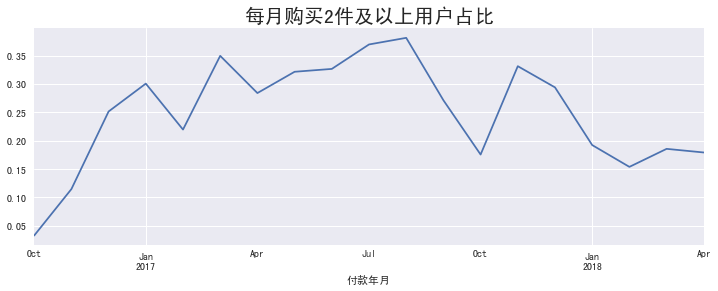

In [12]:
morethan1p_per_M.plot(figsize=(12,4))
plt.title('每月购买2件及以上用户占比',fontsize=20)

第二件半价(7.5折)改成买2件送小盒装(四分之一盒,8.8折)后，买2件及以上的人为20%(10%参与满赠活动，10%参与优惠券满减)，之前为30%,参与活动单价为141，之前为109.

In [20]:
#计算促销方式的改变最终带来的活动销售额的增减
((66*80+141*10+109*10)-(66*70+109*30))/(66*70+109*30)

-0.01394169835234474

In [23]:
#计算促销方式的改变最终带来的活动利润的增减
((66*80*0.5+141*10*0.43+109*10*0.41)-(66*70*0.5+109*30*0.33))/(66*70*0.5+109*30*0.33)

0.08972883656427956

可以看出，总购买人数相等的情况下，买2送1会导致活动销售额下降1.4%，但是利润上涨了9%。所以最终看KPI定是否改变方案